In [62]:
import itk
import matplotlib.pyplot as plt

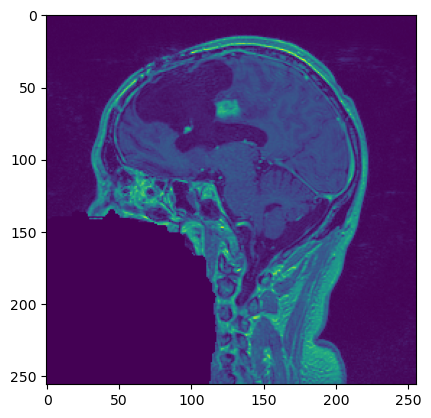

In [63]:
image = itk.imread("Data/case6_gre1.nrrd", itk.F)
plt.imshow(image[80])

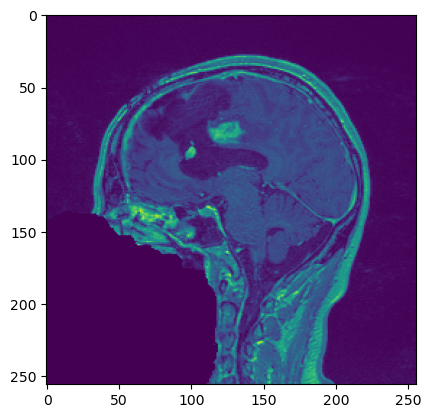

In [64]:
image2 = itk.imread("Data/case6_gre2.nrrd", itk.F)
plt.imshow(image2[80])

In [122]:
def RecalageRigide(fixed_image, moving_image):
    type_ = type(fixed_image)
    outType_ = itk.Image[itk.UC, 3]
    
    registration_method = itk.ImageRegistrationMethodv4[type_, type_].New()
    registration_method.SetFixedImage(fixed_image)
    registration_method.SetMovingImage(moving_image)
    
    transform_type = itk.TranslationTransform[itk.D, 3].New()
    transform_type.SetIdentity()
    registration_method.SetInitialTransform(transform_type)

    metric = itk.MeanSquaresImageToImageMetricv4[type_, type_].New()
    metric.SetFixedImage(fixed_image)
    metric.SetMovingImage(moving_image)

    interpolator = itk.LinearInterpolateImageFunction[type_, itk.D].New()
    metric.SetFixedInterpolator(interpolator)

    registration_method.SetMetric(metric)

    optimizer = itk.RegularStepGradientDescentOptimizerv4.New()
    optimizer.SetLearningRate(4.0)
    optimizer.SetMinimumStepLength(0.001)
    optimizer.SetNumberOfIterations(100)
    registration_method.SetOptimizer(optimizer)
    
    registration_method.Update()
    final_transform = registration_method.GetTransform()
    
    resampler = itk.ResampleImageFilter[type_, type_].New()
    resampler.SetInput(moving_image)
    resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
    resampler.SetOutputOrigin(fixed_image.GetOrigin())
    resampler.SetOutputSpacing(fixed_image.GetSpacing())
    resampler.SetOutputDirection(fixed_image.GetDirection())
    resampler.SetTransform(final_transform)

    resampler.Update()
    resampled_image = resampler.GetOutput()

    cast_filter = itk.CastImageFilter[type_, outType_].New()
    cast_filter.SetInput(resampled_image)
    cast_filter.Update()
    return cast_filter.GetOutput()

In [123]:
plt.imshow(RecalageRigide(image, image2)[80])

TemplateTypeError: itk.BSplineInterpolateImageFunction is not wrapped for input type `itk.Image[itk.F,3], itk.D, itk.D`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.BSplineInterpolateImageFunction.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.BSplineInterpolateImageFunction[itk.Image[itk.SS,2], itk.D, itk.SS].New(my_input)

* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.SS,2]
itk.Image[itk.UC,2]
itk.Image[itk.US,2]
itk.Image[itk.F,2]
itk.Image[itk.D,2]
itk.Image[itk.SS,3]
itk.Image[itk.UC,3]
itk.Image[itk.US,3]
itk.Image[itk.F,3]
itk.Image[itk.D,3]
itk.Image[itk.SS,4]
itk.Image[itk.UC,4]
itk.Image[itk.US,4]
itk.Image[itk.F,4]
itk.Image[itk.D,4]
